In [53]:
import numpy as np
from qiskit import *
import matplotlib 


In [54]:
qr = QuantumRegister(2)
#measurements from quantum bits = use classical register
cr = ClassicalRegister(2)

In [55]:
circuit = QuantumCircuit(qr, cr)

In [56]:
circuit.draw()

q63_0: 
       
q63_1: 
       
 c2: 2/

In [57]:
# adding quantum gates to create entanglement (Hadamart gate)
circuit.h(qr[0])


In [58]:
%matplotlib inline

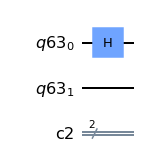

In [59]:
circuit.draw(output='mpl')

In [60]:
#two qubit operation control X (logical if)
circuit.cx(qr[0], qr[1])


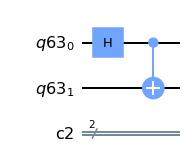

In [61]:
circuit.draw(output='mpl') #entanglement achieved 

In [62]:
#measurement, storing measurements into computational register 
circuit.measure(qr,cr)

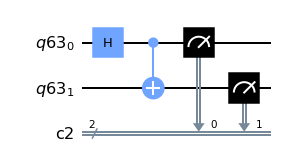

In [63]:
circuit.draw(output='mpl')

In [64]:
#performance simulations 
simulator = Aer.get_backend('qasm_simulator')

In [65]:
execute(circuit, backend = simulator)

In [66]:
result = execute(circuit, backend = simulator).result()

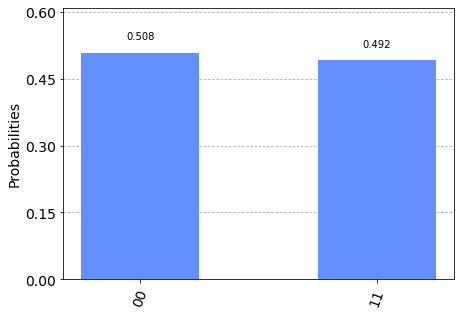

In [67]:
#plotting results
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [68]:
#running circuit on quantum computer 
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-04 14:58:53,253: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
provider= IBMQ.get_provider('ibm-q')

In [70]:
qcomp = provider.get_backend('ibmq_manila')

In [71]:
job= execute(circuit, backend=qcomp)

In [72]:
from qiskit.tools import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [84]:
result = job.result()

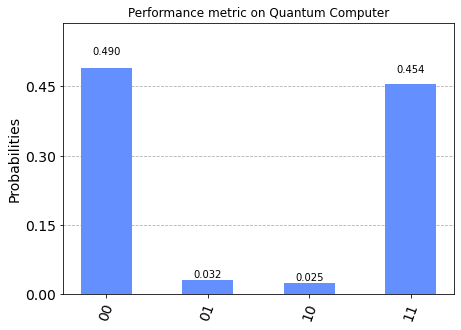

In [86]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit), title='Performance metric on Quantum Computer')